**Module 10**<br>
**ATMOS 5340: Environmental Programming and Statistics**<br>
**John Horel and Derek Mallia**<br>
<br>

<br>

> # Announcement: 
> Your 6th programming assignment on 2D and map plotting will be due in ~1 1/2 weeks.

> # Today's Objective<br>
> Map plotting basics with Cartopy<br>
> Adjusting map projections<br>
> Adding points, images, and background data to Cartopy maps<br>
> Overlaying color-filled contours and vectors to a map<br>
<br><br>

Before starting: Make sure that you open up a Jupyter notebook session using OnDemand so you can interactively follow along with today's lecture!
<br><br>
Today's juypter notebook lecture can be grabbed from my Atmos 5340 directory on CHPC:<br><br>
*/uufs/chpc.utah.edu/common/home/u0703457/public_html/dereks_homepage/Atmos_5340/scripts*




## Cartopy

Cartopy is a Python library that is designed to process designed to process and map geospatial data for geospatial data analyses. This package was originally developed by the UK Meteorological Office to allow scientists to visualise their data on maps quickly and accurately. 

From https://scitools.org.uk/cartopy:
>Cartopy makes use of the powerful PROJ.4, NumPy and Shapely libraries and includes a programmatic interface built on >top of Matplotlib for the creation of publication quality maps.

>Key features of cartopy are its object oriented projection definitions, and its ability to transform points, lines, vectors, polygons and images between those projections.

>You will find cartopy especially useful for large area / small scale data, where Cartesian assumptions of spherical data traditionally break down. If you’ve ever experienced a singularity at the pole or a cut-off at the dateline, it is likely you will appreciate cartopy’s unique features!






Lets start by importing the Cartopy library.... Will also be using matplotlib functions for plotting data ontop of our cartopy maps.


In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



Now, lets create a simple map of the world...

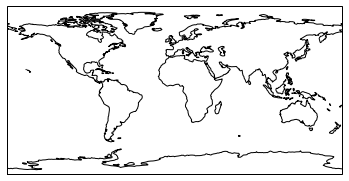

In [2]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.savefig('coastlines.png')

plt.show()


Note that we also told python to save our map to a png file. Pop open a linux session and/or navigate to your webpage. Did our code save anything to the png file?

The line `plt.axes(projection=ccrs.PlateCarree())` sets up a GeoAxes instance. In this example, we used the `coastlines()` method to add coastlines to the map.

We can also overlay map images onto our map.... Or change our map projection:

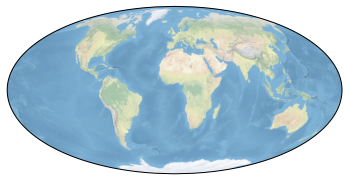

In [3]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

We can even lay over our coastline from the previous example!

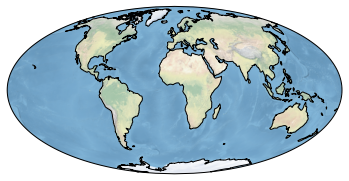

In [4]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
ax.coastlines()
plt.show()

<br><br>
Data can also be added to your Cartopy map. For example

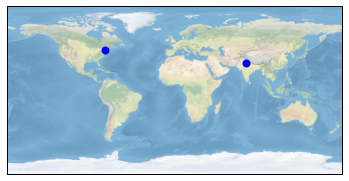

In [5]:
#Lets add some points to our map
ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.scatter([ny_lon, delhi_lon], [ny_lat, delhi_lat],color='blue', linewidth=2, marker='o')

<br><br> 
We can also add lines...

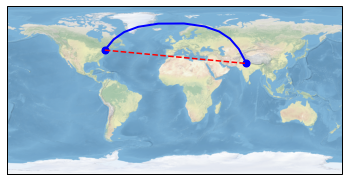

In [6]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.scatter([ny_lon, delhi_lon], [ny_lat, delhi_lat],color='blue', linewidth=2, marker='o')
plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],color='blue', linewidth=2, marker='o',transform=ccrs.Geodetic())
plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],color='red', linestyle='--',transform=ccrs.PlateCarree())


Once you have the map just the way you want it, data can be added to it
in exactly the same way as with normal Matplotlib axes.
<br><br>
By default, the coordinate system of any data added to a GeoAxes is the 
same as the coordinate system of the GeoAxes itself, to control which 
coordinate system that the given data is in, you can add the transform 
keyword with an appropriate cartopy.crs.CRS instance.
<br><br>
Notice how the line in blue between New York and Delhi is not straight 
on a flat PlateCarree map? Since the Geodetic coordinate system
is a true spherical coordinate system, our line line between two points 
is defined as the shortest path between those points on the globe rather 
than 2D Cartesian space.

<br><br>
Cartopy also gives us the ability to zoom in on our map by setting 
an axis extent. For example, lets say we wanted to zoom in on North 
America in the plot we were working with above...

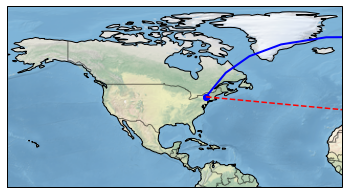

In [7]:
#Save axes object
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

#Lets add some national borders & coastlines..
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=.5)

#And lets add some points to our map
plt.scatter([ny_lon, delhi_lon], [ny_lat, delhi_lat],color='blue', marker='o')
plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],color='blue', linewidth=2, marker='o',transform=ccrs.Geodetic())
plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],color='red', linestyle='--',transform=ccrs.PlateCarree())

#And finally, our domain extent in degrees lat/lon
ax.set_extent([-170, -10, 0, 70]) 



Pretty nifty right?

<br><br>
What if we wanted to zoom in on Utah?

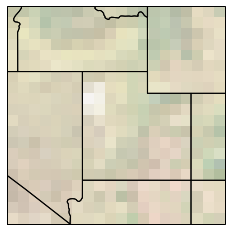

In [8]:
#Save axes object
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

#Lets add some national borders & coastlines..
ax.add_feature(cfeature.STATES.with_scale('50m'))

#And finally, our domain extent in degrees lat/lon
ax.set_extent([-117.5, -107.5,35,45])



Neat. However, I wouldn't say Utah looks particular detailed using Cartopy's default stock image. 
Can we overlay something else to make this look prettier?


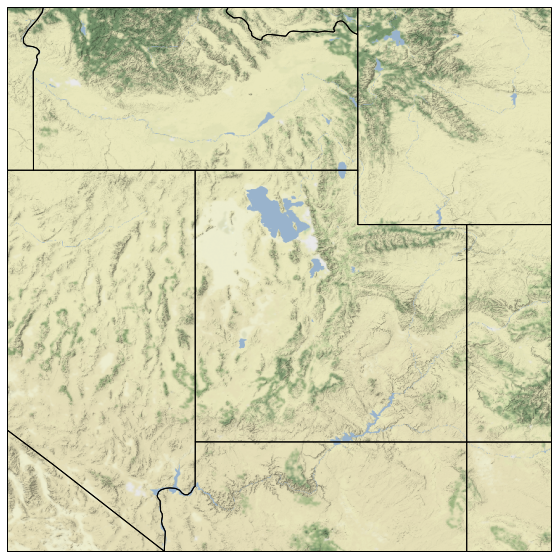

In [9]:
import cartopy.io.img_tiles as cimgt

#Lets expand the size of our figure
figure, ax = plt.subplots(figsize=(15, 10))

#Lets request some tile data...
request = cimgt.Stamen(style='terrain-background')

#Lets plot up our projection and state borders (at 50m grid spacing)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-117.5, -107.5,35,45])
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.add_image(request, 8)

plt.show()

Much better! Using Cartopy, we can import tiles from external sources such as 
'maps.stamen.com', google, mapquest, and so on. Here we imported,
a Stamen 'terrain-background' tile, which is particurly good for showing 
off Utah majestic landscape.
<br><br>

<br><br>
Can we use other tiles?

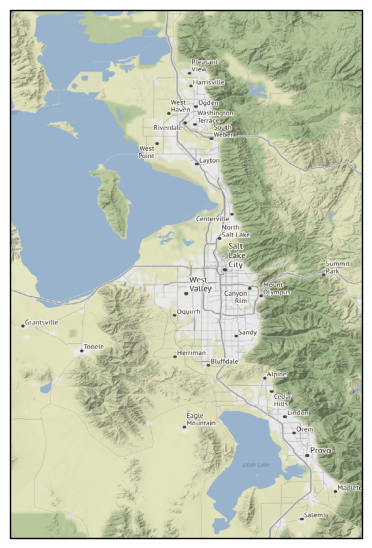

In [10]:
#Lets expand the size of our figure
figure, ax = plt.subplots(figsize=(10, 7),dpi=100)

#Lets request some tile data...
request = cimgt.Stamen(style='terrain')

#Lets plot up our projection and state borders (at 50m grid spacing)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-112.5, -111.5,40.00,41.5])
ax.add_image(request, 10)

plt.show()

Here, we just switched the argument for style to `terrain`

**Next, lets plot up some *interesting* radar data on some of our maps...**

The Iowa Environmental Mesonet stitches together NEXRAD moasic files as .png images every 5 minutes. These images are served as a Web Map Service. This example shows how to add those images to a cartopy figure axes.<br><br>
Data Source: https://mesonet.agron.iastate.edu/docs/nexrad_composites/<br>
Script snipits provided by Brian Baylock<br>

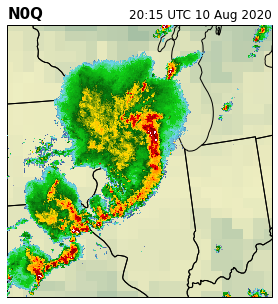

In [11]:
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


#Pick a time using the datetime function
DATE = datetime(2020, 8, 10, 20, 15)

#Pick size for our map
fig = plt.figure(figsize=(15, 5))

#What version of the radar data do we want to select? This should be a string.
#N0Q: Base Reflectivity - 8 bit/0.5 dbz resolution
version = 'n0q'

#Plot data on a Lambert conformal grid, with coastline, national borders, and states
ax = fig.add_subplot(1, 1, 1,projection=ccrs.LambertConformal(central_longitude=-100))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
    
# Date string format for data request
strDATE = DATE.strftime('%Y-%m-%dT%H:%M:%SZ')

#Specify title based on data we selected
ax.set_title('%s' % DATE.strftime('%H:%M UTC %d %b %Y'), loc='right')
ax.set_title(version.upper(), loc='left', fontweight='bold', fontsize=15)
    
#Grab NEXRAD mosaic radar WMS layer from Iowa Environmental Mesonet
#Data Source: https://mesonet.agron.iastate.edu/docs/nexrad_composites/
ax.add_wms(wms='https://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/%s-t.cgi?' % version,
            layers='nexrad-%s-wmst' % version,
            wms_kwargs={'time':strDATE, 'transparent':True}, zorder=10)

# ^ If you add a background image or use tiles you neet to set transparent
#   as True and set the zorder as a higher number, i.e. 10.
    
ax.stock_img()
    
ax.set_extent([-94, -85, 38, 45])   

fig.subplots_adjust(wspace=0.02)



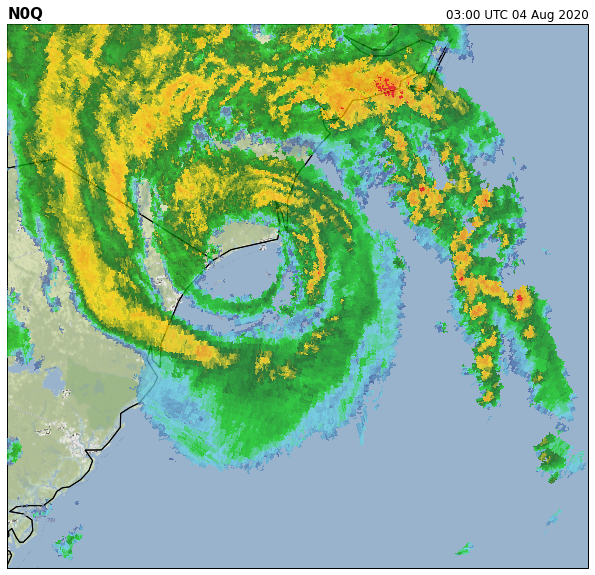

In [12]:
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

#Pick a time using the datetime function
DATE = datetime(2020, 8, 4, 3, 0)

#Pick size for our map
fig = plt.figure(figsize=(15, 10))

#What version of the radar data do we want to select? This should be a string.
#N0Q: Base Reflectivity - 8 bit/0.5 dbz resolution
version = 'n0q'

#Plot data on a Lambert conformal grid, with coastline, national borders, and states
ax = fig.add_subplot(1, 1, 1,projection=ccrs.LambertConformal(central_longitude=-100))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
    
# Date string format for data request
strDATE = DATE.strftime('%Y-%m-%dT%H:%M:%SZ')

#Grab NEXRAD mosaic radar WMS layer from Iowa Environmental Mesonet
#Data Source: https://mesonet.agron.iastate.edu/docs/nexrad_composites/
ax.set_title('%s' % DATE.strftime('%H:%M UTC %d %b %Y'), loc='right')
ax.set_title(version.upper(), loc='left', fontweight='bold', fontsize=15)
    
ax.add_wms(wms='https://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/%s-t.cgi?' % version,
            layers='nexrad-%s-wmst' % version,
            wms_kwargs={'time':strDATE, 'transparent':True}, zorder=10,alpha=.75)

# ^ If you add a background image or use tiles you neet to set transparent
#   as True and set the zorder as a higher number, i.e. 10.
    
#Since we are zoomed in, we should probably pick a more slick tile map... Lets
#go with our Stamen tiles.
request = cimgt.Stamen(style='terrain')
ax.add_image(request, 10)
ax.set_extent([-80, -76,32,35])   


fig.subplots_adjust(wspace=0.02)




What do you think we are looking at?
<br><br>
Do you think you can find another time with some interesting radar data? 
Use the existing code snippits and try to pick a time and domain of a severe 
weather event of your choice!
<br><br>
Post some of your output to Teams!
<br><br>

## Plotting gridded data sets

As a meteorologist and air quality researcher, I mostly used Cartopy for plotting *gridded* 
data sets, such as those produced from weather models and emission inventories. 

In the next example, we are going to work weather forecast data from the 
Global Forecast System (GFS) model. This is the flagship US model, which is 
used to make weather forecasts across the globe, hence its a global data set.

This next snipits of code is long, but it brings together man of the concepts that 
we've covered in this class! Lets step through this together!


In [13]:
import pygrib
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units
import xarray as xr

In [14]:
#get gfs on 1degree lat/lon grid from NOMADS server in grib2 format
date = '20200812' # YYYYMMDD
modelRun = '00' # HH
#obtained from https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20200812/00/

#specify forecast hour of file
forecastHour = '000' # HHH

#local path
path='/uufs/chpc.utah.edu/common/home/u0703457/public_html/dereks_homepage/Atmos_5340/class_files/GFS'
gFile = '/gfs.t'+modelRun+'z.pgrb2.1p00.f'+forecastHour

#open file using pygrib
grbs = pygrib.open(path+gFile)
#what is in the file?
for g in grbs:
  print (g.typeOfLevel, g.level, g.name, g.shortName,g.validDate, g.analDate, g.forecastTime)

hybrid 1 Cloud mixing ratio clwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
hybrid 1 Ice water mixing ratio icmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
hybrid 1 Rain mixing ratio rwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
hybrid 1 Snow mixing ratio snmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
hybrid 1 Graupel (snow pellets) grle 2020-08-12 00:00:00 2020-08-12 00:00:00 0
atmosphere 0 Maximum/Composite radar reflectivity refc 2020-08-12 00:00:00 2020-08-12 00:00:00 0
surface 0 Visibility vis 2020-08-12 00:00:00 2020-08-12 00:00:00 0
unknown 0 U component of wind u 2020-08-12 00:00:00 2020-08-12 00:00:00 0
unknown 0 V component of wind v 2020-08-12 00:00:00 2020-08-12 00:00:00 0
unknown 0 Ventilation Rate VRATE 2020-08-12 00:00:00 2020-08-12 00:00:00 0
surface 0 Wind speed (gust) gust 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInPa 40 Geopotential Height gh 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInPa 40 Temperature t 2020-08-12 00:00:00 2020-08-12 00:00:00 0
iso

isobaricInhPa 100 Ozone mixing ratio o3mr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 150 Geopotential Height gh 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 150 Temperature t 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 150 Relative humidity r 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 150 Total Cloud Cover tcc 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 150 Vertical velocity w 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 150 Geometric vertical velocity wz 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 150 U component of wind u 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 150 V component of wind v 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 150 Absolute vorticity absv 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 150 Cloud mixing ratio clwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 150 Ice water mixing ratio icmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isoba

isobaricInhPa 500 Geometric vertical velocity wz 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 500 U component of wind u 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 500 V component of wind v 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 500 Absolute vorticity absv 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 500 Cloud mixing ratio clwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 500 Ice water mixing ratio icmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 500 Rain mixing ratio rwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 500 Snow mixing ratio snmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 500 Graupel (snow pellets) grle 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 500 Ozone mixing ratio o3mr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 550 Geopotential Height gh 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 550 Temperature t 2020-08-12 00:00:00 2020-08-12 00:0

isobaricInhPa 900 Geopotential Height gh 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 900 Temperature t 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 900 Relative humidity r 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 900 Total Cloud Cover tcc 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 900 Vertical velocity w 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 900 Geometric vertical velocity wz 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 900 U component of wind u 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 900 V component of wind v 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 900 Absolute vorticity absv 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 900 Cloud mixing ratio clwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 900 Ice water mixing ratio icmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 900 Rain mixing ratio rwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobar

heightAboveGroundLayer 3000 Storm relative helicity hlcy 2020-08-12 00:00:00 2020-08-12 00:00:00 0
heightAboveGroundLayer 6000 U-component storm motion ustm 2020-08-12 00:00:00 2020-08-12 00:00:00 0
heightAboveGroundLayer 6000 V-component storm motion vstm 2020-08-12 00:00:00 2020-08-12 00:00:00 0
tropopause 0 Pressure pres 2020-08-12 00:00:00 2020-08-12 00:00:00 0
tropopause 0 ICAO Standard Atmosphere reference height icaht 2020-08-12 00:00:00 2020-08-12 00:00:00 0
tropopause 0 Geopotential Height gh 2020-08-12 00:00:00 2020-08-12 00:00:00 0
tropopause 0 Temperature t 2020-08-12 00:00:00 2020-08-12 00:00:00 0
tropopause 0 U component of wind u 2020-08-12 00:00:00 2020-08-12 00:00:00 0
tropopause 0 V component of wind v 2020-08-12 00:00:00 2020-08-12 00:00:00 0
tropopause 0 Vertical speed shear vwsh 2020-08-12 00:00:00 2020-08-12 00:00:00 0
maxWind 0 Pressure pres 2020-08-12 00:00:00 2020-08-12 00:00:00 0
maxWind 0 ICAO Standard Atmosphere reference height icaht 2020-08-12 00:00:00 202

In [15]:
# get 500 hPa geopotential height
h = grbs.select(shortName='gh',level=500)
# Extract all the values
h5_all = h[0].values
#what are the dimensions? note lat first, lon second
print(np.shape(h5_all))

# Get the lat/lon grids from the grib2 file
lats_all, lons_all = h[0].latlons()

# get 500 hPa u wind
u = grbs.select(shortName='u',level=500)
# Extract the values
u5_all = u[0].values
# get 500 hPa v wind
v = grbs.select(shortName='v',level=500)
# Extract the values
v5_all = v[0].values

grbs.close()

(181, 360)


In [16]:
#make the data more manageable in this case for a US centric sector
#upper left corner lat/lon
ult = 70
uln = 180
#lower right corner lat/lon
rlt = 15
rln = 340
#convert lat/lons to grid indices
ulti = 90-ult
ulni = uln
rlti = 90-rlt
rlni = rln

#truncate the arrays
h5 = h5_all[ulti:rlti,ulni:rlni]
u5 = u5_all[ulti:rlti,ulni:rlni]
v5 = v5_all[ulti:rlti,ulni:rlni]
lats = lats_all[ulti:rlti,ulni:rlni]
lons = lons_all[ulti:rlti,ulni:rlni]

In [17]:
#compute coriolis parameter
omega = 7.292*1.E-5
f = 2 * omega * np.sin(np.pi*lats/180.)

In [18]:
#setup projection
#plot as lambert conformal
mapcrs = ccrs.LambertConformal(central_longitude=-97.5,
                               central_latitude=38.5,
                               standard_parallels=(30, 60))

states = cartopy.feature.NaturalEarthFeature(
            category='cultural', scale='50m', facecolor='none',
            name='admin_1_states_provinces_shp')
# Set up the projection for the data
datacrs = ccrs.PlateCarree()
# color maps
rcol = mcm.get_cmap('YlOrBr')
bcol = mcm.get_cmap('GnBu_r')

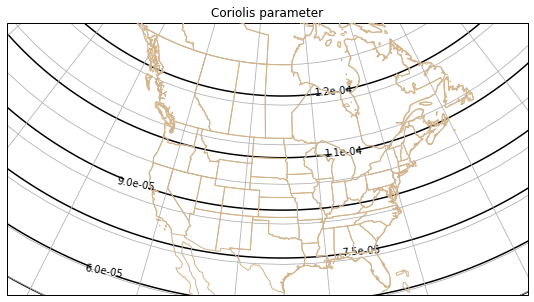

In [19]:
#plot coriolis parameter
fig,ax = plt.subplots(figsize=(20,5),subplot_kw={'projection': mapcrs})
ax.set_extent([-140,-60,20,60])
#focus on NA

# Plot fields
cs=ax.contour(lons,lats,f,transform=datacrs,colors='black')
plt.clabel(cs,fmt='%.1e',inline=True)
ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
ax.set_title('Coriolis parameter')
plt.savefig('gfs_f.png')
plt.show()

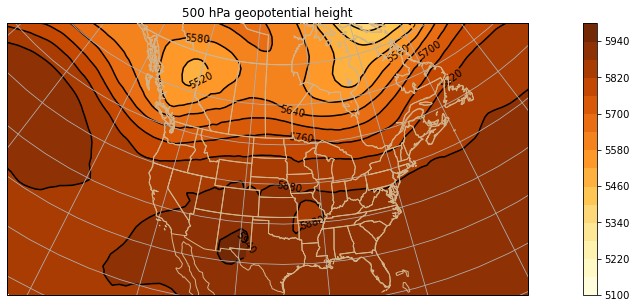

In [20]:
fig,ax = plt.subplots(figsize=(20,5),subplot_kw={'projection': mapcrs})
ax.set_extent([-140,-60,20,60])
# Plot height field
# select center contour interval, interval, and number of contours
cnt5 = 5580
int5 = 60
no5 = 8
lh5 = cnt5 - no5 * int5
up5 = cnt5 + no5 * int5
cs=ax.contour(lons,lats,h5,levels=range(lh5,up5,int5),transform=ccrs.PlateCarree(),colors='black')
cs1 = ax.contourf(lons,lats,h5,levels=range(lh5,up5,int5),cmap=rcol,transform=ccrs.PlateCarree())
cb=plt.colorbar(cs1)
plt.clabel(cs,fmt='%0.f',inline=True)

ax.set_title('500 hPa geopotential height')
ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
plt.savefig('gfs_ht.png')
plt.show()

In [21]:
# use metpy functions to do the 'heavy lifting'
#https://unidata.github.io/MetPy/
#find the increments in each direction on the grid
dx, dy = mpcalc.lat_lon_grid_deltas(lons,lats)
print(np.shape(dx),np.shape(dy))
#metpy needs units declared for calculations
h5 = h5 * units.meter
f = f / units.second
#compute geostrophic wind
ug5,vg5 = mpcalc.geostrophic_wind(h5, f, dx, dy)

(55, 159) (54, 160)


In [22]:
# calculate speed of wind, geostrophic wind, ageostrophic wind
u5 = u5 * units.meter / units.second
v5 = v5 * units.meter / units.second
sp5 = mpcalc.wind_speed(u5, v5)
#print('min speed %.1f' % np.min(sp5))
#print('max speed %.1f' % np.max(sp5))
gsp5 = mpcalc.wind_speed(ug5, vg5)
#in the following the '.m' means use the magnitude of the variable
#print('min geo speed %.1f' % np.min(gsp5.m))
#print('max geo speed %.1f' % np.max(gsp5.m))
# ageostrophic wind
ua5 = u5 - ug5
va5 = v5 - vg5
agsp5 = mpcalc.wind_speed(ua5, va5)
#print('min ageo speed %.1f' % np.min(agsp5))
#print('max ageo speed %.1f' % np.max(agsp5))

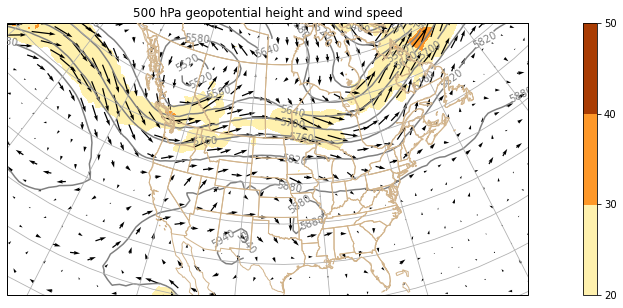

In [23]:
#plot the winds and heights
fig,ax = plt.subplots(figsize=(20,5),subplot_kw={'projection': mapcrs})
ax.set_extent([-140,-60,20,60])
# Plot height field
cs=ax.contour(lons,lats,h5,levels=range(lh5,up5,int5),transform=ccrs.PlateCarree(),colors='grey')
#plot wind speed
cs1 = ax.contourf(lons,lats,sp5,cmap=rcol,levels=range(20,60,10),transform=ccrs.PlateCarree())
cb=plt.colorbar(cs1)
plt.clabel(cs,fmt='%0.f',inline=True)

#u5 and v5 need to be set as numpy array
u5 = np.array(u5)
v5 = np.array(v5)

#plot every third wind vector
skip=(slice(None,None,3),slice(None,None,3))
plt.quiver(lons[skip],lats[skip],u5[skip],v5[skip],pivot='tail',color='black',transform=ccrs.PlateCarree())
plt.clabel(cs,fmt='%0.f',inline=True)
ax.set_title('500 hPa geopotential height and wind speed')
ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
plt.savefig('gfs_ht_wind.png')
plt.show()

In [24]:
#compute divergence
#smooth winds first to reduce chatter
u5s = mpcalc.smooth_gaussian(u5,5)
v5s = mpcalc.smooth_gaussian(v5,5)
div = mpcalc.divergence(u5s,v5s,dx,dy)
print('min divergence %.1e' % np.min(div.m))
print('max divergence %.1e' % np.max(div.m))
div = div *1.E6
div_r = np.max(div.m)-np.min(div.m)
div_int = int(div_r/8)

min divergence -3.7e-05
max divergence 5.4e-05


positive range(11, 44, 11)
negative range(-44, -11, 11)


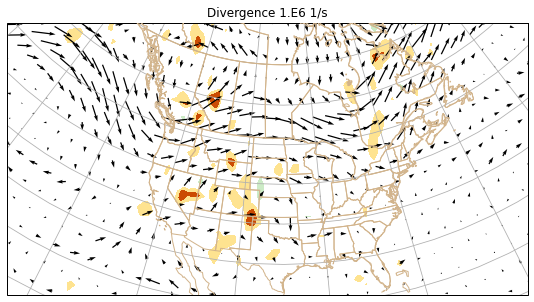

In [25]:
# Plot divergence
fig,ax = plt.subplots(figsize=(20,5),subplot_kw={'projection': mapcrs})
ax.set_extent([-140,-60,20,60])
# fill pos divergence
dlev=range(div_int,div_int*4,div_int)
print('positive',dlev)
cs = plt.contourf(lons,lats,div,cmap=rcol,levels=dlev,transform=ccrs.PlateCarree())
# fill neg divergence
dlev=range(-div_int*4,-div_int,div_int)
print('negative',dlev)
cs = plt.contourf(lons,lats,div,cmap=bcol,levels=dlev,transform=ccrs.PlateCarree())
#plt.contour(lons,lats,div,colors='black',linewidths=0.5,transform=ccrs.PlateCarree())
plt.quiver(lons[skip],lats[skip],u5[skip],v5[skip],pivot='tail',color='black',transform=ccrs.PlateCarree())
plt.clabel(cs,fmt='%0.1f',inline=True)
#cb=plt.colorbar(cs)
ax.set_title('Divergence 1.E6 1/s')
ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
plt.savefig('ex_div.png')
plt.show()

In [26]:
#compute vorticity using smoothed winds
u5s = u5s * units.meter / units.second
v5s = v5s * units.meter / units.second
vor = mpcalc.vorticity(u5s,v5s,dx,dy)
vor = vor *1.E5
vor_r = np.max(vor.m)-np.min(vor.m)
vor_int = int(vor_r/8)
print(vor_int)
print('min vorticity %.1e' % np.min(vor.m))
print('max vorticity %.1e' % np.max(vor.m))

4
min vorticity -8.9e+00
max vorticity 2.5e+01


positive range(4, 16, 4)
negative range(-16, -4, 4)


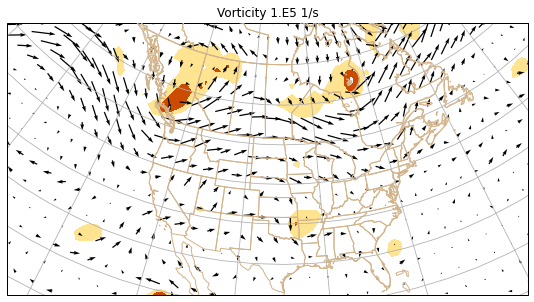

In [27]:
# Plot vorticity
fig,ax = plt.subplots(figsize=(20,5),subplot_kw={'projection': mapcrs})
ax.set_extent([-140,-60,20,60])
# fill pos vorticity
vlev=range(vor_int,vor_int*4,vor_int)
print('positive',vlev)
cs = plt.contourf(lons,lats,vor,cmap=rcol,levels=vlev,transform=ccrs.PlateCarree())
# fill neg vorticity
vlev=range(-vor_int*4,-vor_int,vor_int)
print('negative',vlev)
cs = plt.contourf(lons,lats,vor,cmap=bcol,levels=vlev,transform=ccrs.PlateCarree())
#plt.contour(lons,lats,vor,colors='black',linewidths=0.5,transform=ccrs.PlateCarree())
plt.quiver(lons[skip],lats[skip],u5[skip],v5[skip],pivot='tail',color='black',transform=ccrs.PlateCarree())
#cb=plt.colorbar(cs)
ax.set_title('Vorticity 1.E5 1/s')
ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
plt.savefig('ex_vor.png')
plt.show()

Neat! Now that we create some examples, maybe now would be a good time to create 
some of your own maps using the GFS data that we loaded in. For example, maybe we 
want to plot data winds a 700 hPa instead of 500 hPa. Do those winds look different?

Maybe we are interesting in looking at determining whether we have monsoonal moisture 
coming into Utah. Relative humidity would be a create variable to look at to see if that
is the case! 


